<a href="https://colab.research.google.com/github/viktortat/Crypto_Bot/blob/master/Test_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install binance-connector

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.5 MB/s eta 0:00:00


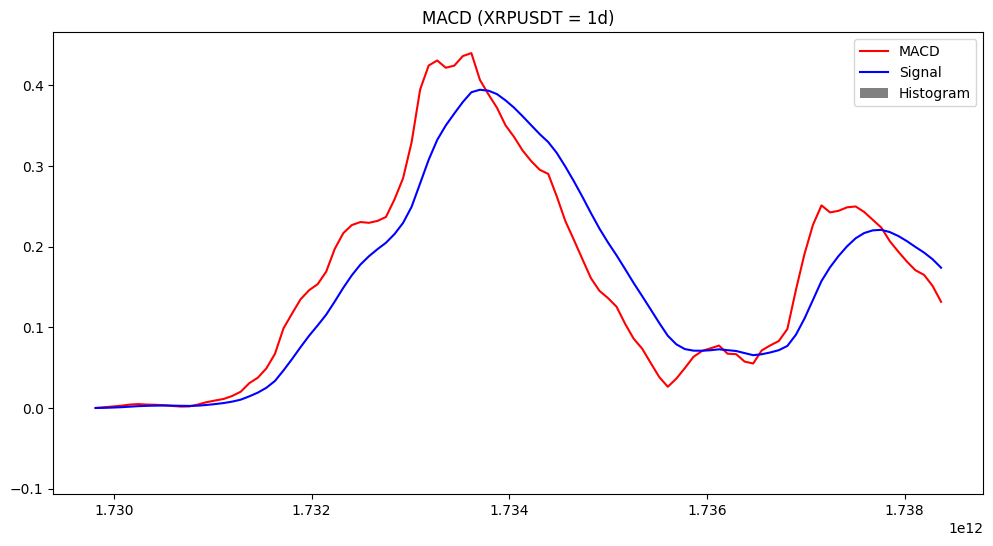

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from binance.spot import Spot
import pandas as pd
import json

client = Spot()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

symbol = 'XRPUSDT'
interval = '1d'
limit = 100

r = client.klines(symbol=symbol, interval=interval, limit=limit)
df = pd.DataFrame(r).iloc[:, 0:5]
df.columns = ['timestamp', 'open', 'high', 'low', 'close']
df['ma_fast'] = df['close'].ewm(span=12, adjust=False).mean()   # скользящее среднее быстрое
df['ma_slow'] = df['close'].ewm(span=26, adjust=False).mean()   # скользящее среднее медленное
df['macd'] = df['ma_fast'] - df['ma_slow']                      # MACD
df['signal'] = df['macd'].ewm(span=9, adjust=False).mean()      # сигнальная линия
df['histogram'] = df['macd'] - df['signal']                     # гистограмма
# print(df.tail(10))

# График
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['macd'], label=f'MACD', color='red')
plt.plot(df['timestamp'], df['signal'], label='Signal', color='blue')
plt.bar(df['timestamp'], df['histogram'], label='Histogram', color='gray')
plt.title(f'MACD ({symbol} = {interval})')
plt.legend()
plt.show()